Epoch 1/5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4246 - loss: 1.0577 - val_accuracy: 0.5308 - val_loss: 0.9883
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6509 - loss: 0.8216 - val_accuracy: 0.6224 - val_loss: 0.8993
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7913 - loss: 0.5007 - val_accuracy: 0.5676 - val_loss: 1.1110
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9391 - loss: 0.1995 - val_accuracy: 0.5568 - val_loss: 1.4527
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9851 - loss: 0.0614 - val_accuracy: 0.5378 - val_loss: 1.9653
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5278 - loss: 2.0021
Test Accuracy: 0.53


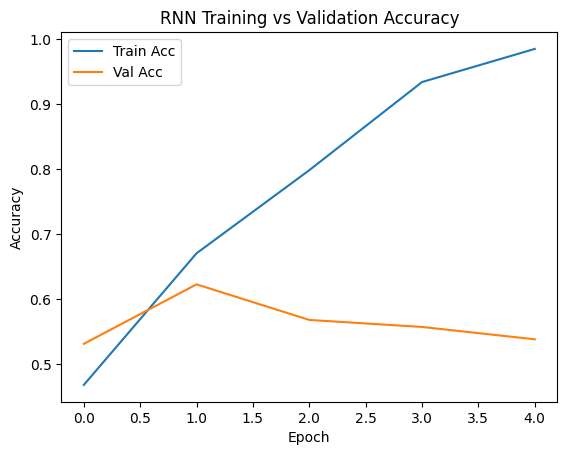

In [29]:
#DL 5
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import random


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


def add_neutral_class(y_data, percent=0.2):
    y_new = []
    for label in y_data:
        if random.random() < percent:
            y_new.append(2)  # neutral
        else:
            y_new.append(label)
    return np.array(y_new)

y_train = add_neutral_class(y_train)
y_test = add_neutral_class(y_test)

maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=maxlen),
    SimpleRNN(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training vs Validation Accuracy')
plt.legend()
plt.show()